In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import missingno as msngo
from datetime import datetime
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, median_absolute_error,r2_score
from sklearn import preprocessing
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import datasets, metrics
from sklearn.model_selection import KFold
from fitter import Fitter, get_common_distributions
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector
import xgboost as xgb
from numpy import array
from sklearn.metrics import accuracy_score
from urllib.request import urlretrieve

In [2]:
#Carga de la base
maestro = pd.read_csv("Maestro_gestiones_justificacion.csv", sep = ";")

In [3]:
print(f"\nCliente con mayor repeticiones\n \
{maestro.Rut.value_counts().head(1)}") #maximo de repetidos por un cliente 79
print(f"\nCliente con menor repeticiones\n \
      {maestro.Rut.value_counts().tail(1)}") #minimo de repetidos por un cliente 1


Cliente con mayor repeticiones
 15449408-1    79
Name: Rut, dtype: int64

Cliente con menor repeticiones
       11664879-2    1
Name: Rut, dtype: int64


<AxesSubplot:>

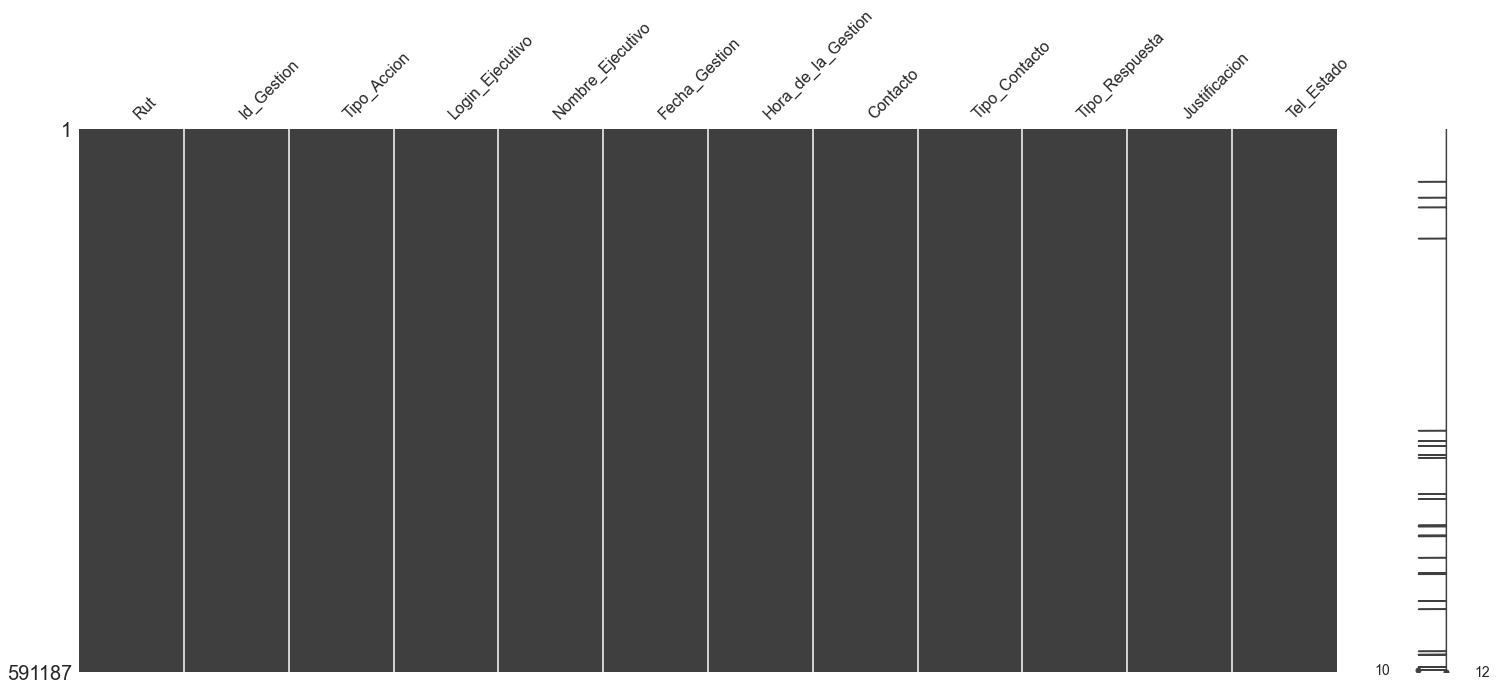

In [4]:
#----maestro.Rut.apply(lambda x: "{0:0>12}".format(x))----- usar en caso de necesitar juntar rut12

msngo.matrix(maestro) #existen msngo

In [5]:
#identificacion de las columnas
maestro.info() #identifica missing en Contacto y en Tipo_contacto

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 591187 entries, 0 to 591186
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Rut                 591187 non-null  object
 1   Id_Gestion          591187 non-null  int64 
 2   Tipo_Accion         591187 non-null  object
 3   Login_Ejecutivo     591187 non-null  object
 4   Nombre_Ejecutivo    591187 non-null  object
 5   Fecha_Gestion       591187 non-null  int64 
 6   Hora_de_la_Gestion  591187 non-null  object
 7   Contacto            591162 non-null  object
 8   Tipo_Contacto       591162 non-null  object
 9   Tipo_Respuesta      591187 non-null  object
 10  Justificacion       591187 non-null  object
 11  Tel_Estado          591187 non-null  object
dtypes: int64(2), object(10)
memory usage: 54.1+ MB


In [6]:
#Muestra las variables de cada columna, identificacion de exploracion
print(f"\n-----Tipo_Accion-----\n \
{maestro.Tipo_Accion.unique()}"
      f"\n-----Fecha_Gestion-----\n \
{maestro.Fecha_Gestion.unique()}"
      f"\n-----Contacto-----\n \
{maestro.Contacto.unique()}"
      f"\n-----Tipo_Contacto-----\n \
{maestro.Tipo_Contacto.unique()}"
      f"\n-----Tipo_Respuesta-----\n \
{maestro.Tipo_Respuesta.unique()}"
      f"\n-----Justificacion-----\n \
{maestro.Justificacion.unique()}"
      f"\n-----Tel_Estado-----\n \
{maestro.Tel_Estado.unique()}")


-----Tipo_Accion-----
 ['Llamado Manual' 'Negociaci�n' 'Llamado Entrante' 'Implementaci�n'
 'Correo Electr�nico Manual' 'Cargo en Cuenta en PU'
 'NO Recomienda Cobro de Garantia' 'Recomienda Cobro de Garantia'
 'Gesti�n Comercial (BEME)' 'Gesti�n Cob. Administrativa'
 'B�squeda Datos Telef�nicos' 'Visita Terreno' 'Visita Normalizaci�n'
 'An�lisis Gesti�n MARS' 'Multiatenci�n Sucursal'
 'Gesti�n PEM Banco (PEQEMP)' 'Pase a Gesti�n Judicial (GNC)'
 'Gesti�n Riesgo (PEQEMP)' 'B�squeda de datos' 'Llamada de Seguimiento'
 'Gestion Supervisor Call Center' 'Cliente Contactado' 'Gesti�n Comercial']
-----Fecha_Gestion-----
 [20230120 20230109 20230123 20230121 20230105 20230118 20230114 20230117
 20230131 20230125 20230112 20230113 20230130 20230111 20230126 20230110
 20230116 20230103 20230124 20230104 20230106 20230127 20230119 20230107
 20230128]
-----Contacto-----
 ['No existe Contacto' 'Titular' 'Sin Contacto' 'Tercero Mayor de 18 a�os'
 'Equivocado' 'Repr. Legal / Encar. Pago' 'Telefono 

In [7]:
maestro.Justificacion.value_counts()

Cliente No informa Motivo de No Pago                   512135
Ingresos insuficientes                                  62378
Cesante sin Seguro                                       5197
Enfermedades y gastos m�dicos                            4043
Con desfase entre fechas de pago/ingreso                 2517
Puede pagar                                              1585
Al d�a                                                    891
Negociando en Sucursal                                    551
PAC/PAT No aplicado                                       434
EMPRESA-Reducci�n en Ventas o Ingresos                    418
Trabajos espor�dicos                                      259
Con licencia m�dica                                       213
No reconoce cuota impaga                                  176
Se niega a pagar                                          124
Insolvente - Ley 20.720                                   100
EMPRESA-No entrega motivo                                  64
Indica c

In [8]:
maestro.describe()

,Id_Gestion,Fecha_Gestion
count,5.911870e+05,5.911870e+05
mean,5.986539e+08,2.023012e+07
std,3.085788e+06,7.518220e+00
min,5.924391e+08,2.023010e+07
25%,5.963544e+08,2.023011e+07
50%,5.988867e+08,2.023012e+07
75%,6.009531e+08,2.023012e+07
max,6.042536e+08,2.023013e+07


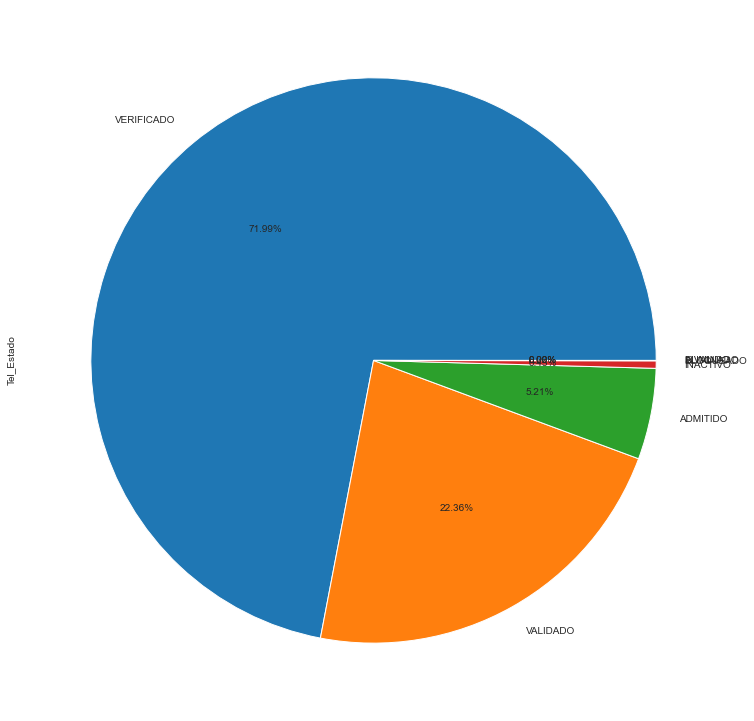

In [9]:
maestro.Tel_Estado.value_counts().plot(kind='pie', autopct='%.2f%%',
                                       figsize = (13,13));

In [38]:
barra = maestro.Tel_Estado.value_counts()
barra1 = DataFrame(barra).reset_index().rename(columns= {"index":"Estado"})
barra1

,Estado,Tel_Estado
0,VERIFICADO,425594
1,VALIDADO,132179
2,ADMITIDO,30783
3,INACTIVO,2513
4,ELIMINADO,95
5,BLOQUEADO,22
6,INVALIDO,1


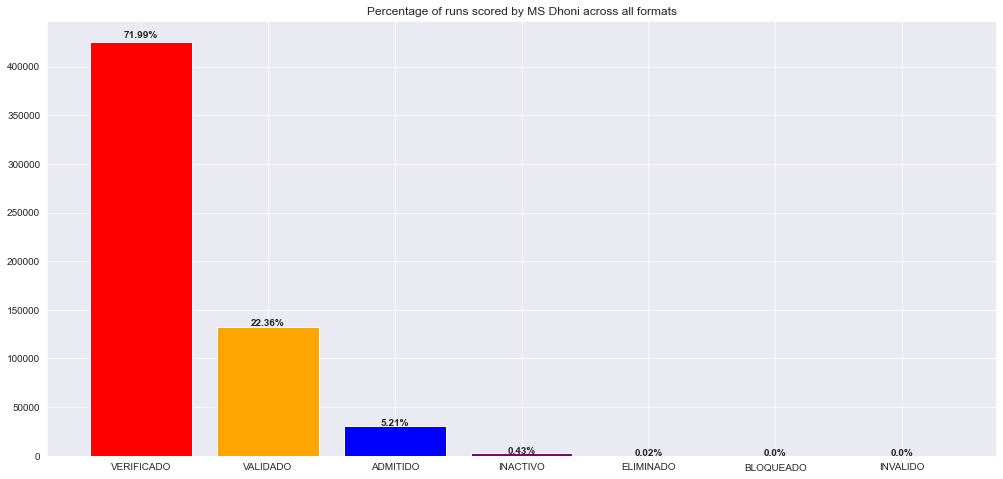

In [39]:
total_Tel_Estado = barra1.Tel_Estado.sum()
percentage = []
for i in range(barra1.shape[0]):
      pct = (barra1.Tel_Estado[i] / total_Tel_Estado) * 100
      percentage.append(round(pct,2))
barra1['Percentage'] = percentage

# depict illustration
plt.figure(figsize=(17,8))
colors_list = ['Red','Orange', 'Blue', 'Purple']
graph = plt.bar(barra1.Estado,barra1.Tel_Estado, color = colors_list)
plt.title('Percentage of runs scored by MS Dhoni across all formats')

i = 0
for p in graph:
      width = p.get_width()
      height = p.get_height()
      x, y = p.get_xy()
      plt.text(x+width/2,
               y+height*1.01,
               str(barra1.Percentage[i])+'%',
               ha='center',
               weight='bold')
      i+=1
plt.show()